# San Francisco Salary Dataset

 Kaggle web site provides a dataset for salaries of the government employees in San Francisco from years 2011 to 2014(https://www.kaggle.com/kaggle/sf-salaries).

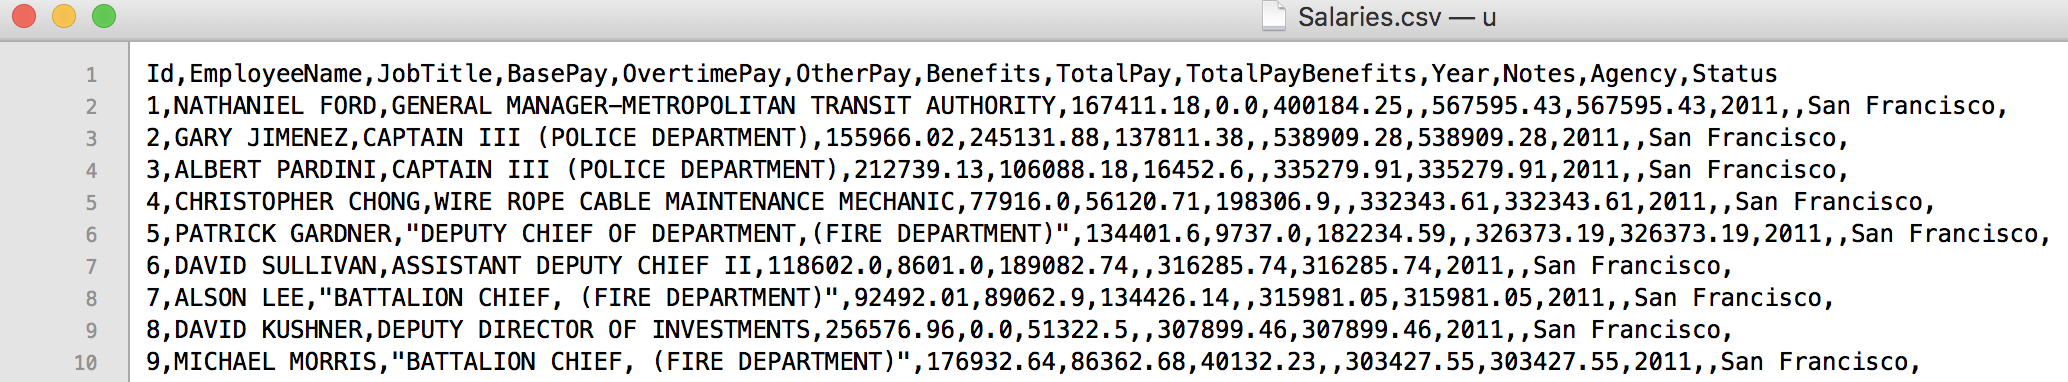

### Let’s find the employees who earn the highest totalPay amount in each year.

First, read the data into dataframe

In [2]:
import pandas as pd
data=pd.read_csv("Salaries.csv",low_memory=False,na_values="Not Provided")


Note that missing data is represented with "Not Provided" text

In [3]:
data.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN  
2  2011    NaN  San Francisco    NaN  
3  2011    NaN  San Francisco    NaN  
4  2011    NaN  San Francisco    NaN

create a list for years

In [4]:
yearlist=data.Year.unique()

In [5]:
yearlist

array([2011, 2012, 2013, 2014])

In [6]:
for year in yearlist:
    print(year)

2011
2012
2013
2014


First, extract data for year 2011, sort the table and take the first row

In [8]:
data2011=data[data.Year==2011].sort_values(by="TotalPay",ascending=False)

In [9]:
data2011.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay  OvertimePay   OtherPay  Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.00  400184.25       NaN  567595.43         567595.43   
1  155966.02    245131.88  137811.38       NaN  538909.28         538909.28   
2  212739.13    106088.18   16452.60       NaN  335279.91         335279.91   
3   77916.00     56120.71  198306.90       NaN  332343.61         332343.61   
4  134401.60      9737.00  182234.59       NaN  326373.19         326373.19   

   Year  Notes         Agency Status  
0  2011    NaN  San Francisco    NaN  
1  2011    NaN  San Francisco    NaN  
2  2011    NaN  San Francisco    NaN  
3  2011    NaN  San Francisco    NaN  
4  2011    NaN  San Francisco    NaN

In [11]:
person=data2011.EmployeeName.iloc[0];person

'NATHANIEL FORD'

In [12]:
salary=data2011.TotalPay.iloc[0];salary

567595.43000000005

Now we write the above script in for loop for each year

In [7]:
for year in yearlist:
    sorteddata=data[data.Year==year].sort_values(by="TotalPay",ascending=False)
    person=sorteddata.EmployeeName.iloc[0]
    salary=sorteddata.TotalPay.iloc[0]
    print("In the year %d %s earned the highest salary which is %8.1f" % (year,person,salary))


In the year 2011 NATHANIEL FORD earned the highest salary which is 567595.4
In the year 2012 Gary Altenberg earned the highest salary which is 362844.7
In the year 2013 Samson  Lai earned the highest salary which is 347102.3
In the year 2014 David Shinn earned the highest salary which is 471952.6


## Find the number of unique job titles and print 10 most frequent job titles. 

before working in the jobtitle column, normalize the strings to lower case

In [13]:
data.JobTitle=data.JobTitle.str.lower()

In [15]:
print("The number of unique job titles is  %d" % len(data.JobTitle.unique()))


The number of unique job titles is  1637


In [16]:
print("Job title         Frequency in the dataset")
print(data.JobTitle.value_counts()[0:10])

Job title         Frequency in the dataset
transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
Name: JobTitle, dtype: int64


Calculate the average TotalPay values for each of the the 10 most frequent job titles

In [25]:
jobtitles_top10=data.JobTitle.value_counts()[:10]
jobtitles_top10



transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
Name: JobTitle, dtype: int64

extract data for only these top10 job titles

In [21]:
data_10jobtitle=data[data.JobTitle.isin(jobtitles_top10.index)]

In [22]:
data_10jobtitle.head()

Id      EmployeeName     JobTitle    BasePay  OvertimePay  OtherPay  \
43    44  michael thompson  firefighter  123013.02    111729.65  15575.26   
102  103   lauifi seumaala  firefighter  105934.69     98534.35  18890.96   
104  105     patric steele  firefighter  105934.64     97395.59  18760.77   
105  106     michael walsh  firefighter  110474.93     83670.04  27043.61   
109  110    scott scholzen  firefighter  105934.67     96154.33  18655.85   

     Benefits   TotalPay  TotalPayBenefits  Year  Notes         Agency Status  
43        NaN  250317.93         250317.93  2011    NaN  San Francisco    NaN  
102       NaN  223360.00         223360.00  2011    NaN  San Francisco    NaN  
104       NaN  222091.00         222091.00  2011    NaN  San Francisco    NaN  
105       NaN  221188.58         221188.58  2011    NaN  San Francisco    NaN  
109       NaN  220744.85         220744.85  2011    NaN  San Francisco    NaN

In [26]:
avgsalary_10jobtitle=data_10jobtitle.groupby(by="JobTitle").TotalPay.mean()

In [27]:
avgsalary_10jobtitle

JobTitle
custodian                        45448.577343
deputy sheriff                  105816.697872
firefighter                     144222.334675
patient care assistant           47114.088098
police officer 3                134906.890909
public svc aide-public works      8242.309452
recreation leader                 6482.997086
registered nurse                113466.920872
special nurse                    32717.231561
transit operator                 63958.939444
Name: TotalPay, dtype: float64

## Find the highest earning 10 job titles

First we will perform filtering.
<br> We don’t want job titles with fewer number of data points spoil our analysis Therefore, we work only job titles that have more than 500 data points

In [29]:
jobtitles_size=data.JobTitle.value_counts()
jobtitles_size.head(10)

transit operator                9424
special nurse                   5791
registered nurse                4955
custodian                       3214
firefighter                     3153
recreation leader               2663
deputy sheriff                  2618
public svc aide-public works    2518
police officer 3                2421
patient care assistant          1945
Name: JobTitle, dtype: int64

Finding job titles having data points more than 500

In [30]:
jobtitles_sizeover500=jobtitles_size[jobtitles_size>500]

In [31]:
jobtitles_sizeover500

transit operator                        9424
special nurse                           5791
registered nurse                        4955
custodian                               3214
firefighter                             3153
recreation leader                       2663
deputy sheriff                          2618
public svc aide-public works            2518
police officer 3                        2421
patient care assistant                  1945
public service trainee                  1656
attorney (civil/criminal)               1503
police officer                          1476
porter                                  1465
general laborer                         1410
gardener                                1187
police officer 2                        1141
parking control officer                 1140
library page                            1107
senior clerk                            1064
senior clerk typist                     1055
sergeant 3                              1047
clerk     

Now extract data for only these job titles

In [32]:
data_jobtitles_sizeover500=data[data.JobTitle.isin(jobtitles_sizeover500.index)]


We can calculate average pays for each job title using pivot_table() function

In [34]:
meandata_jobtitles_sizeover500=data_jobtitles_sizeover50.pivot_table("TotalPayBenefits",index="JobTitle",aggfunc="mean")


In [35]:
meandata_jobtitles_sizeover500.head()

TotalPayBenefits
JobTitle                                        
assoc engineer                     144597.788087
attorney (civil/criminal)          166652.570832
automotive mechanic                112209.740783
clerk                               47587.113194
community police services aide      92655.323900

Now, sort the table and list the top-10 earning professions

In [37]:
meandata_jobtitles_sizeover50.sort_values(by="TotalPayBenefits",ascending=False)[:10]

TotalPayBenefits
JobTitle                                      
lieutenant, fire suppression     224969.190262
sergeant 3                       203184.254327
firefighter                      172080.749562
police officer 2                 171410.482848
emt/paramedic/firefighter        167899.182614
police officer 3                 167736.604601
attorney (civil/criminal)        166652.570832
senior physician specialist      158722.665228
engineer                         153284.633683
manager iii                      147345.586900

### An alternative solution 

We can calculate average pay for each job title after that we can select data for job titles having more than 500 datapoints

In [44]:
mean_data_jobtitle=data.pivot_table(values="TotalPayBenefits",index="JobTitle",aggfunc="mean")

In [45]:
mean_data_jobtitle.head()

TotalPayBenefits
JobTitle                        
account clerk       58212.534872
accountant          47429.268000
accountant i        88122.188750
accountant ii       95086.024027
accountant iii     107741.412158

from the index of this data frame we will choose only job titles that have more than 500 data points

In [47]:
mean_data_jobtitle_over500=mean_data_jobtitle.loc[jobtitles_sizeover500.index]

In [49]:
mean_data_jobtitle_over500.sort_values(by="TotalPayBenefits",ascending=False)[:10]

TotalPayBenefits
lieutenant, fire suppression     224969.190262
sergeant 3                       203184.254327
firefighter                      172080.749562
police officer 2                 171410.482848
emt/paramedic/firefighter        167899.182614
police officer 3                 167736.604601
attorney (civil/criminal)        166652.570832
senior physician specialist      158722.665228
engineer                         153284.633683
manager iii                      147345.586900